# 06-3 주성분 분석

## PCA 클래스

### PCA

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-06-30 02:50:32--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-30 02:50:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-30 02:50:33--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분의 개수를 50개로 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape) 

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

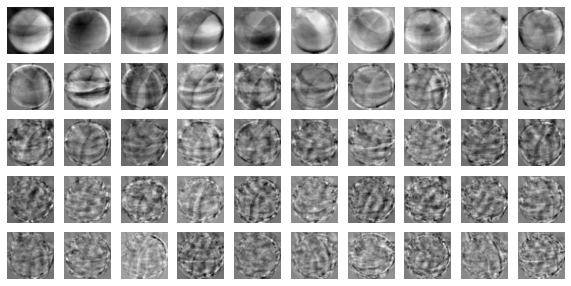

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 주성분 50개

In [6]:
print(fruits_2d.shape) # 특성의 개수를 줄이기 전 (10000개)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d) # 특성의 개수를 줄인 후 (50개)
print(fruits_pca.shape) 

(300, 50)


## 원본 데이터 재구성

### 재구성

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 10000개의 특성 복원
print(fruits_inverse.shape)

(300, 10000)


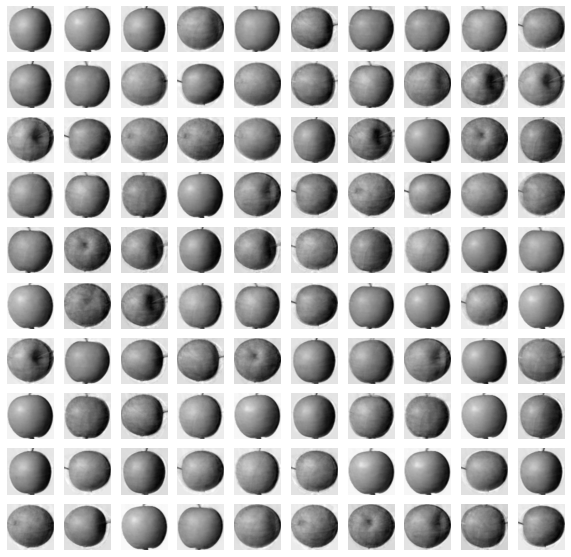

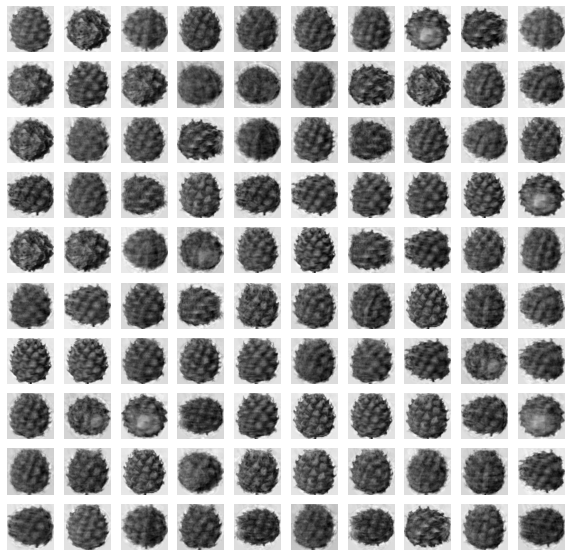

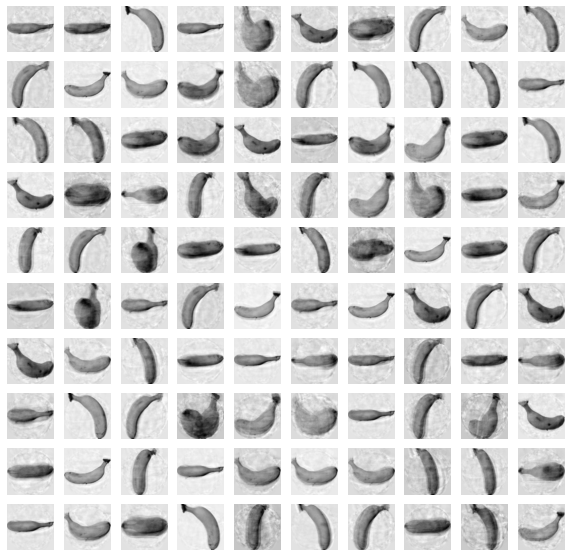

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

### 설명된 분산

In [11]:
# 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_)) 

0.9215763960914736


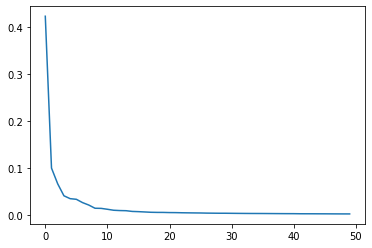

In [12]:
# 처음 10개의 주성분이 대부분의 분산을 표현하고 있음
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

### 분류기와 함께 사용하기

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
# 타깃값이 있어야 하므로 사과를 0, 파인애플을 1, 바나나를 2로 지정
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [17]:
from sklearn.model_selection import cross_validate

# 원본 데이터로 교차 검증 수행
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4380519390106201


In [16]:
# 원본 데이터의 값을 PCA로 축소한 fruits_pca를 사용해 교차 검증 수행
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02567629814147949


In [18]:
# 주성분의 개수 대신 설명된 분산의 비율을 입력
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
# 50%에 달하는 주성분의 경우 2개의 주성분
print(pca.n_components_)

2


In [20]:
# 원본 데이터를 변환 (300, 10000) -> (300, 2)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
# 원본 데이터를 변환한 데이터를 가지고 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04080433845520019


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 군집과 함께 사용하기

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
# 차원 축소된 데이터를 사용해 클러스터를 찾음
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


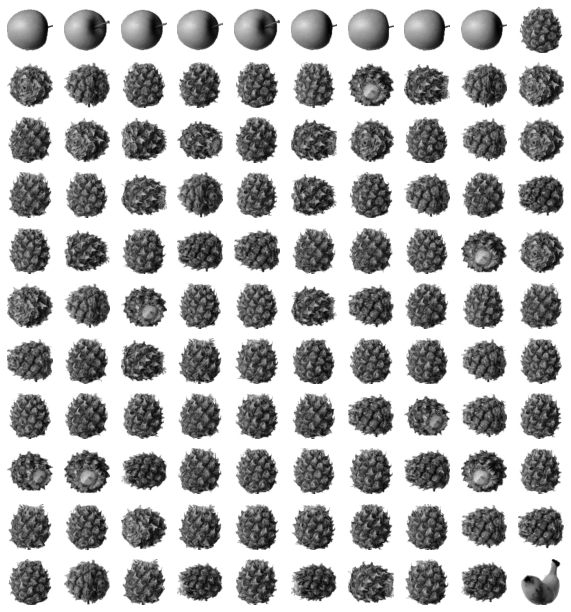

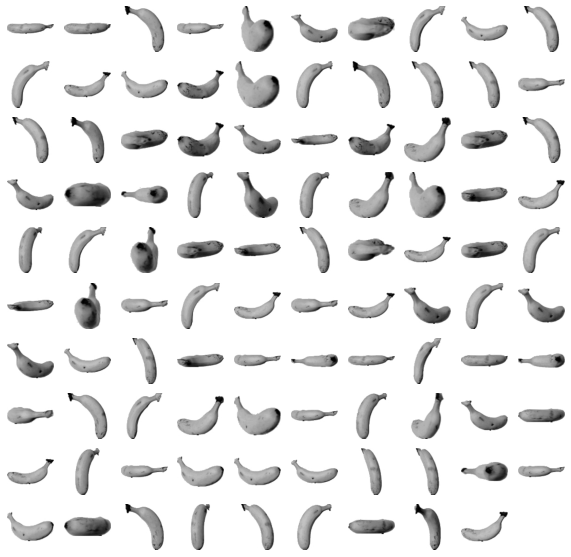

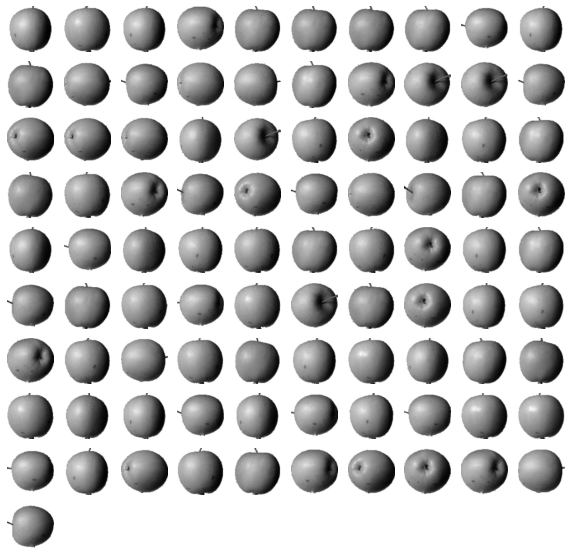

In [23]:
# 레이블을 가지고 이미지 출력
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

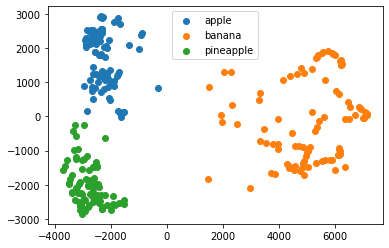

In [24]:
# 산점도
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()